## <center><b><font color="green">INTRODUCTION TO EDA with PLOTLY-PYPLOT</font></b></center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go  #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING
import plotly.express as px
import folium
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coronaa/nedir.jpeg
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths_US.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed_US.csv


In [2]:
data = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv")
confirmed = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
deaths = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
recovered = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

In [3]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
data = data.rename(columns={"Province/State":"State",
                   "Country/Region":"Country"})
data = data.drop(["SNo","Last Update"],1)
data.ObservationDate = pd.to_datetime(data.ObservationDate)

In [5]:
data_to_date = data[data.ObservationDate == max(data.ObservationDate)].reset_index()
data_to_date["Active"] = data_to_date["Confirmed"] - data_to_date["Recovered"]- data_to_date["Deaths"]
data_to_date.head()

,index,ObservationDate,State,Country,Confirmed,Deaths,Recovered,Active
0,36569,2020-06-07,NaN,Afghanistan,20342.0,357.0,1875.0,18110.0
1,36570,2020-06-07,NaN,Albania,1246.0,34.0,938.0,274.0
2,36571,2020-06-07,NaN,Algeria,10154.0,707.0,6717.0,2730.0
3,36572,2020-06-07,NaN,Andorra,852.0,51.0,744.0,57.0
4,36573,2020-06-07,NaN,Angola,91.0,4.0,24.0,63.0


In [6]:
confirmed = confirmed.rename(columns={"Province/State":"State",
                             "Country/Region":"Country"})
confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91


In [7]:
confirmed = pd.melt(confirmed, id_vars = ['State', 'Country', 'Lat', 'Long'], var_name = 'Date', value_name = 'Confirmed')
confirmed.head()

,State,Country,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [8]:
deaths = deaths.rename(columns={"Province/State":"State",
                             "Country/Region":"Country"})

deaths = pd.melt(deaths, id_vars = ['State', 'Country', 'Lat', 'Long'], var_name = 'Date', value_name = 'Deaths')
deaths.head()

,State,Country,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [9]:
recovered = recovered.rename(columns={"Province/State":"State",
                             "Country/Region":"Country"})

recovered = pd.melt(recovered, id_vars = ['State', 'Country', 'Lat', 'Long'], var_name = 'Date', value_name = 'Recovered')

In [10]:
df = pd.merge(confirmed, deaths, on=["State","Country","Lat","Long","Date"])
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0


In [11]:
df = df.replace(np.NaN,"")
data = data.replace(np.NaN,"")
data["ObservationDate"] = pd.to_datetime(data["ObservationDate"])
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0


In [12]:
grouped = df.groupby('Date')['Confirmed', 'Deaths'].sum().reset_index()
grouped = grouped[grouped["Date"]==max(grouped["Date"])].reset_index(drop=True)
grouped.style.background_gradient(cmap="hot")

,Date,Confirmed,Deaths
0,2020-06-07 00:00:00,7009065,402730


## <span style="color:green">General situation</span>

In [13]:
data_grouped = data_to_date.groupby("Country")["Confirmed","Deaths","Recovered","Active"].sum().reset_index().sort_values(by='Deaths', ascending=False).reset_index(drop=True)[:50]
data_grouped["DeathRate"] = data_grouped["Deaths"] / data_grouped["Confirmed"]
data_grouped.style.background_gradient(cmap='Reds')

,Country,Confirmed,Deaths,Recovered,Active,DeathRate
0,US,1942363.000000,110514.000000,506367.000000,1325482.000000,0.056897
1,UK,287621.000000,40625.000000,1239.000000,245757.000000,0.141245
2,Brazil,691758.000000,36455.000000,283952.000000,371351.000000,0.052699
3,Italy,234998.000000,33899.000000,165837.000000,35262.000000,0.144252
4,France,191102.000000,29158.000000,70961.000000,90983.000000,0.152578
5,Spain,241550.000000,27136.000000,150376.000000,64038.000000,0.112341
6,Mexico,117103.000000,13699.000000,83775.000000,19629.000000,0.116982
7,Belgium,59226.000000,9595.000000,16291.000000,33340.000000,0.162007
8,Germany,185750.000000,8685.000000,169224.000000,7841.000000,0.046756
9,Iran,171789.000000,8281.000000,134349.000000,29159.000000,0.048204


In [14]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data.groupby("ObservationDate")["Confirmed"].sum().index,
            y=data.groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers'
    ))

fig.add_trace(
    go.Line(name="Deaths",
        x=data.groupby("ObservationDate")["Deaths"].sum().index,
        y=data.groupby("ObservationDate")["Deaths"].sum().values,mode='markers'
    ))

fig.add_trace(
    go.Line(name="Recovered",
        x=data.groupby("ObservationDate")["Recovered"].sum().index,
        y=data.groupby("ObservationDate")["Recovered"].sum().values,mode='markers'
    ))

fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Date")
fig.show()

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [15]:
df_to_date = df[df.Date == max(df.Date)].reset_index()
df_grouped = df_to_date.groupby("Country")["Confirmed","Deaths"].sum().reset_index().sort_values(by='Deaths', ascending=False).reset_index(drop=True)

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=2, max_zoom=4, zoom_start=2)

for i in range(0, len(df_to_date)):
    folium.Circle(
        location=[df_to_date.iloc[i]['Lat'], df_to_date.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(df_to_date.iloc[i]['Country'])+
                    '<li><bold>State : '+str(df_to_date.iloc[i]['State'])+
                    '<li><bold>Confirmed : '+str(df_to_date.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(df_to_date.iloc[i]['Deaths']),
                    
        radius=int(df_to_date.iloc[i]['Confirmed'])).add_to(m)
m

In [16]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data_grouped.sort_values(by="DeathRate", ascending=False)["Country"],
        y=data_grouped.sort_values(by="DeathRate", ascending=False)["DeathRate"],mode='lines+markers',
        marker=dict(line=dict(color='white',width=5))
    ))
fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Death rate by country",
                  xaxis =  {'showgrid': False},yaxis = {'showgrid': True})
fig.show()

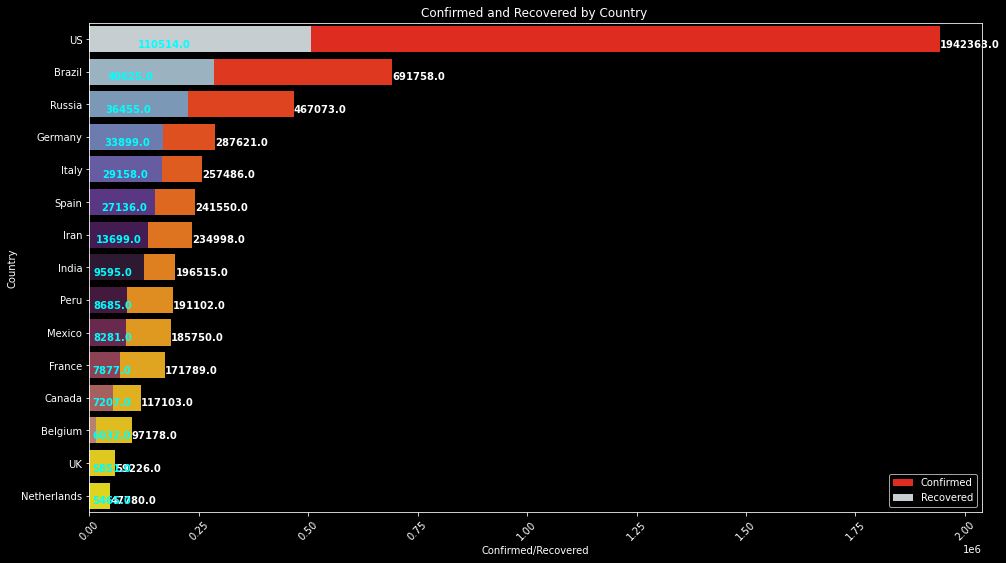

In [17]:
n_con = list(data_grouped.head(15).sort_values('Confirmed', ascending=False)["Confirmed"])
n_recovered = list(data_grouped.head(15).sort_values('Deaths', ascending=False)["Deaths"])

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.figure(figsize=(16,9))

sns.barplot(x="Confirmed", y="Country",palette="autumn",data=data_grouped.head(15).sort_values('Confirmed', ascending=False),label="Confirmed")
sns.barplot(x="Recovered", y="Country",palette="twilight",data=data_grouped.head(15).sort_values('Recovered', ascending=False), label="Recovered")
plt.xticks(rotation= 45)
plt.xlabel('Confirmed/Recovered')
plt.ylabel('Country')
plt.grid(False)
for i, v in enumerate(n_con):
    plt.text(v + 3, i + .25, str(v), color='white', fontweight='bold')
    
for i, v in enumerate(n_recovered):
    plt.text(v + 3, i + .25, str(v), color='cyan', fontweight='bold')
    
plt.legend()    
plt.title('Confirmed and Recovered by Country ')
plt.show()

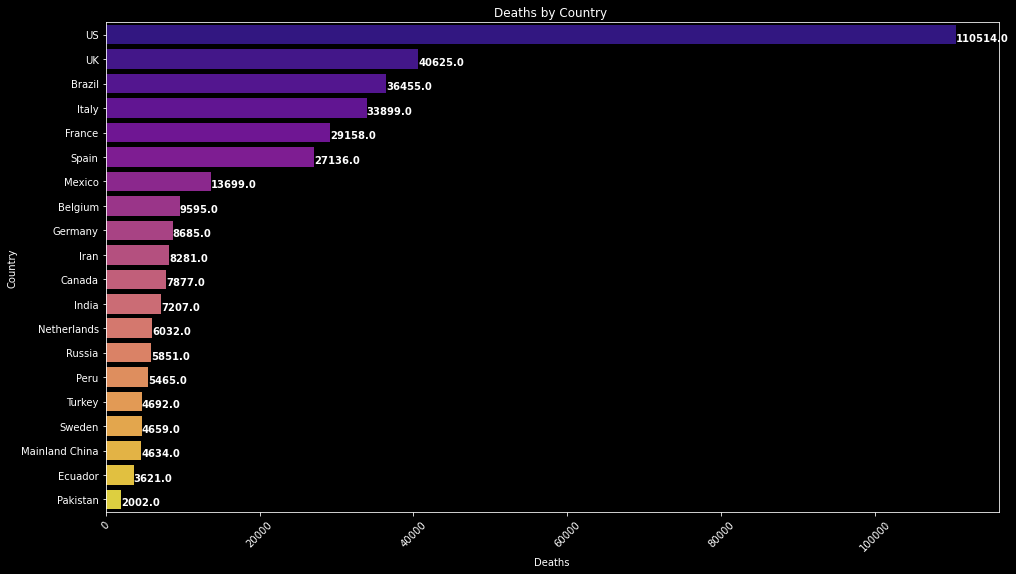

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(16,9))

sns.barplot(x="Deaths", y="Country",palette="plasma",data=data_grouped.groupby("Country")["Deaths"].sum().reset_index().sort_values(by="Deaths",ascending=False).head(20))
plt.xticks(rotation= 45)
plt.xlabel('Deaths')
plt.ylabel('Country')
plt.grid(False)
for i, v in enumerate(list(data_grouped.groupby("Country")["Deaths"].sum().reset_index().sort_values(by="Deaths",ascending=False).head(20)["Deaths"])):
    plt.text(v + 3, i + .25, str(v), color='white', fontweight='bold')
plt.title('Deaths by Country ')
plt.show()

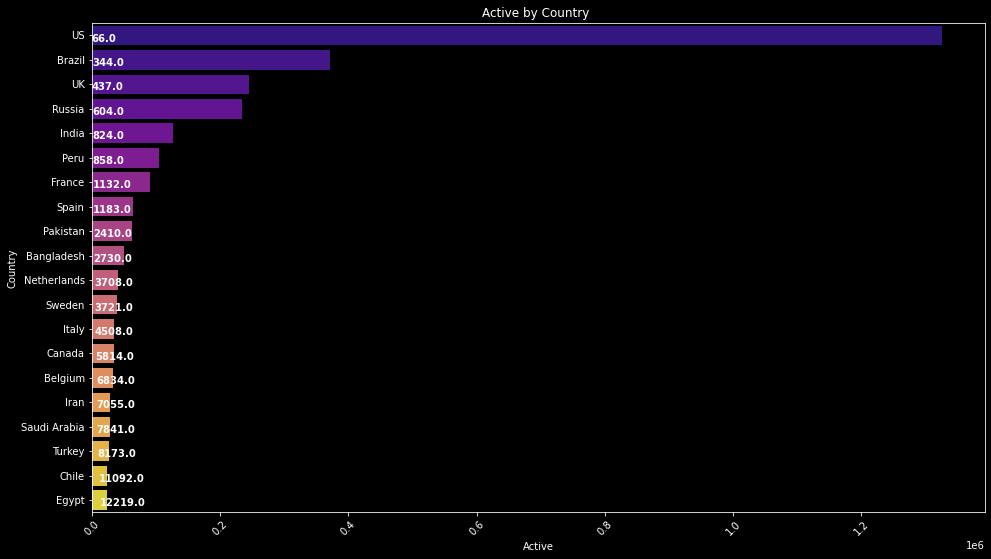

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(16,9))

sns.barplot(x="Active", y="Country",palette="plasma",data=data_grouped.groupby("Country")["Active"].sum().reset_index().sort_values(by="Active",ascending=False).head(20))
plt.xticks(rotation= 45)
plt.xlabel('Active')
plt.ylabel('Country')
plt.grid(False)
for i, v in enumerate(list(data_grouped.groupby("Country")["Active"].sum().reset_index().sort_values(by="Active",ascending=True).head(20)["Active"])):
    plt.text(v + 3, i + .25, str(v), color='white', fontweight='bold')
plt.title('Active by Country ')
plt.show()

In [20]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data[data.Country=="US"].groupby("ObservationDate")["Confirmed"].sum().index,
        y=data[data.Country=="US"].groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers',
         marker=dict(line=dict(color="green",
                     width=5)
    )))

fig.add_trace(
    go.Line(name="Deaths",
        x=data[data.Country=="US"].groupby("ObservationDate")["Deaths"].sum().index,
        y=data[data.Country=="US"].groupby("ObservationDate")["Deaths"].sum().values,mode='markers',
         marker=dict(line=dict(color="red",
                     width=4)
    )))

fig.add_trace(
    go.Line(name="Recovered",
        x=data[data.Country=="US"].groupby("ObservationDate")["Recovered"].sum().index,
        y=data[data.Country=="US"].groupby("ObservationDate")["Recovered"].sum().values,mode='markers',
         marker=dict(line=dict(color="white",
                     width=3)
    )))
fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Date of US",
                  xaxis =  {'showgrid': False},yaxis = {'showgrid': True})
fig.show()

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [21]:
usa = data_to_date[data_to_date.Country=="US"].sort_values(by="Confirmed",ascending=False).head(20)

fig = go.Figure()

fig.add_trace(
    go.Bar(name="Confirmed",
        x=usa["State"],
            y=usa["Confirmed"],
            offsetgroup=0,
            marker={'color': usa["Confirmed"],'colorscale': 'Viridis'}
    ))

fig.add_trace(
    go.Scatter(name="Deaths",
        x=usa["State"],
        y=usa["Deaths"]
    ))
fig.add_trace(
    go.Bar(name="Active",
        x=usa["State"],
        y=usa["Active"],
        offsetgroup=0
    ))


fig.update_layout(title_text="Confirmed and Deaths for USA States (TOP 20 for most Confirmed)", width=800, height=500, plot_bgcolor='rgb(10,10,10)')
fig.show()

In [22]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data[data.Country=="Italy"].groupby("ObservationDate")["Confirmed"].sum().index,
        y=data[data.Country=="Italy"].groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers',
         marker=dict(line=dict(color="green",
                     width=5)
    )))

fig.add_trace(
    go.Line(name="Deaths",
        x=data[data.Country=="Italy"].groupby("ObservationDate")["Deaths"].sum().index,
        y=data[data.Country=="Italy"].groupby("ObservationDate")["Deaths"].sum().values,mode='markers',
         marker=dict(line=dict(color="red",
                     width=4))
    ))

fig.add_trace(
    go.Line(name="Recovered",
        x=data[data.Country=="Italy"].groupby("ObservationDate")["Recovered"].sum().index,
        y=data[data.Country=="Italy"].groupby("ObservationDate")["Recovered"].sum().values,mode='markers',
         marker=dict(line=dict(color="white",
                     width=3))
    ))

fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Date of Italy",
                 xaxis =  {'showgrid': False},yaxis = {'showgrid': True})
fig.show()

In [23]:
italy = data_to_date[data_to_date.Country=="Italy"].sort_values(by="Confirmed",ascending=False).head(20)

fig = go.Figure()

fig.add_trace(
    go.Bar(name="Confirmed",
        x=italy["State"],
            y=italy["Confirmed"],
            offsetgroup=0,
            marker={'color': italy["Confirmed"],'colorscale': 'Viridis'}
    ))

fig.add_trace(
    go.Scatter(name="Deaths",
        x=italy["State"],
        y=italy["Deaths"]
    ))

fig.add_trace(
    go.Bar(name="Active",
        x=italy["State"],
        y=italy["Active"],
        offsetgroup=0
    ))

fig.update_layout(title_text="Confirmed, Deaths and Active for Italy States (TOP 20 for most Confirmed)", width=800, height=500,  plot_bgcolor='rgb(10,10,10)')
fig.show()

In [24]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data[data.Country=="Mainland China"].groupby("ObservationDate")["Confirmed"].sum().index,
        y=data[data.Country=="Mainland China"].groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers',
         marker=dict(line=dict(color="green",
                     width=5))
    ))

fig.add_trace(
    go.Line(name="Deaths",
        x=data[data.Country=="Mainland China"].groupby("ObservationDate")["Deaths"].sum().index,
        y=data[data.Country=="Mainland China"].groupby("ObservationDate")["Deaths"].sum().values,mode='markers',
         marker=dict(line=dict(color="red",
                     width=4))
    ))

fig.add_trace(
    go.Line(name="Recovered",
        x=data[data.Country=="Mainland China"].groupby("ObservationDate")["Recovered"].sum().index,
        y=data[data.Country=="Mainland China"].groupby("ObservationDate")["Recovered"].sum().values,mode='markers',
         marker=dict(line=dict(color="white",
                     width=3))
    ))

fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Date of China")
fig.show()

In [25]:
china = data_to_date[data_to_date.Country=="Mainland China"].sort_values(by="Confirmed",ascending=False).head(20)

fig = go.Figure()

fig.add_trace(
    go.Bar(name="Confirmed",
        x=china["State"],
            y=china["Confirmed"],
            offsetgroup=0,
            marker={'color': china["Confirmed"],'colorscale': 'Viridis'}
    ))

fig.add_trace(
    go.Scatter(name="Deaths",
        x=china["State"],
        y=china["Deaths"]
    ))


fig.update_layout(title_text="Confirmed and Deaths for China States (TOP 20 for most Confirmed)", width=800, height=500, plot_bgcolor='rgb(10,10,10)')
fig.show()

In [26]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data[data.Country=="Germany"].groupby("ObservationDate")["Confirmed"].sum().index,
        y=data[data.Country=="Germany"].groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers',
         marker=dict(line=dict(color="green",
                     width=5))
    ))

fig.add_trace(
    go.Line(name="Deaths",
        x=data[data.Country=="Germany"].groupby("ObservationDate")["Deaths"].sum().index,
        y=data[data.Country=="Germany"].groupby("ObservationDate")["Deaths"].sum().values,mode='markers',
         marker=dict(line=dict(color="red",
                     width=4))
    ))

fig.add_trace(
    go.Line(name="Recovered",
        x=data[data.Country=="Germany"].groupby("ObservationDate")["Recovered"].sum().index,
        y=data[data.Country=="Germany"].groupby("ObservationDate")["Recovered"].sum().values,mode='markers',
         marker=dict(line=dict(color="white",
                     width=3))
    ))

fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Date of Germany")
fig.show()

In [27]:
germany = data_to_date[data_to_date.Country=="Germany"].sort_values(by="Confirmed",ascending=False).head(20)

fig = go.Figure()

fig.add_trace(
    go.Bar(name="Confirmed",
        x=germany["State"],
            y=germany["Confirmed"],
            offsetgroup=0,
            marker={'color': china["Confirmed"],'colorscale': 'Viridis'}
    ))

fig.add_trace(
    go.Scatter(name="Deaths",
        x=germany["State"],
        y=germany["Deaths"]
    ))

fig.add_trace(
    go.Bar(name="Active",
        x=germany["State"],
        y=germany["Active"],offsetgroup=0
    ))



fig.update_layout(title_text="Confirmed, Deaths and Active for Germany States (TOP 20 for most Confirmed)", width=800, height=500, plot_bgcolor='rgb(10,10,10)')
fig.show()

In [28]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data[data.Country=="Turkey"].groupby("ObservationDate")["Confirmed"].sum().index,
        y=data[data.Country=="Turkey"].groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers',
         marker=dict(line=dict(color="green",
                     width=5)
    )))

fig.add_trace(
    go.Line(name="Deaths",
        x=data[data.Country=="Turkey"].groupby("ObservationDate")["Deaths"].sum().index,
        y=data[data.Country=="Turkey"].groupby("ObservationDate")["Deaths"].sum().values,mode='markers',
        marker=dict(line=dict(color='red',width=5))
    ))

fig.add_trace(
    go.Line(name="Recovered",
        x=data[data.Country=="Turkey"].groupby("ObservationDate")["Recovered"].sum().index,
        y=data[data.Country=="Turkey"].groupby("ObservationDate")["Recovered"].sum().values,mode='markers',
        marker=dict(line=dict(color='white',width=5))
    ))


fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Date of Turkey")
                
fig.show()

In [29]:
brazil = data_to_date[data_to_date.Country=="Brazil"].sort_values(by="Confirmed",ascending=False).head(20)

fig = go.Figure()

fig.add_trace(
    go.Bar(name="Confirmed",
        x=brazil["State"],
            y=brazil["Confirmed"],
            offsetgroup=0,
            marker={'color': china["Confirmed"],'colorscale': 'Viridis'}
    ))

fig.add_trace(
    go.Scatter(name="Deaths",
        x=brazil["State"],
        y=brazil["Deaths"]
    ))

fig.add_trace(
    go.Bar(name="Active",
        x=brazil["State"],
        y=brazil["Active"],offsetgroup=0
    ))



fig.update_layout(title_text="Confirmed, Deaths and Active for Brazil States (TOP 20 for most Confirmed)", width=800, height=500, plot_bgcolor='rgb(10,10,10)')
fig.show()

In [30]:
fig = go.Figure()

fig.add_trace(
    go.Line(name="Confirmed",
        x=data[data.Country=="Brazil"].groupby("ObservationDate")["Confirmed"].sum().index,
        y=data[data.Country=="Brazil"].groupby("ObservationDate")["Confirmed"].sum().values,mode='lines+markers',
         marker=dict(line=dict(color="green",
                     width=5)
    )))

fig.add_trace(
    go.Line(name="Deaths",
        x=data[data.Country=="Brazil"].groupby("ObservationDate")["Deaths"].sum().index,
        y=data[data.Country=="Brazil"].groupby("ObservationDate")["Deaths"].sum().values,mode='markers',
        marker=dict(line=dict(color='red',width=4))
    ))

fig.add_trace(
    go.Line(name="Recovered",
        x=data[data.Country=="Brazil"].groupby("ObservationDate")["Recovered"].sum().index,
        y=data[data.Country=="Brazil"].groupby("ObservationDate")["Recovered"].sum().values,mode='markers',
        marker=dict(line=dict(color='white',width=3))
    ))


fig.update_layout(width=800, height=500, plot_bgcolor='rgb(10,10,10)', title_text="Confirmed, Deaths and Recovered by Dates of Brazil")
                
fig.show()